In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split



In [ ]:
import json

In [ ]:
with open('appraisals_dataset.json') as f:
    data = json.load(f)

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data.head()

,appraisals
0,"{'orderID': '4762597', 'subject': {'address': ..."
1,"{'orderID': '4762739', 'subject': {'address': ..."
2,"{'orderID': '4763065', 'subject': {'address': ..."
3,"{'orderID': '4763086', 'subject': {'address': ..."
4,"{'orderID': '4763087', 'subject': {'address': ..."


In [ ]:
data

,appraisals
0,"{'orderID': '4762597', 'subject': {'address': ..."
1,"{'orderID': '4762739', 'subject': {'address': ..."
2,"{'orderID': '4763065', 'subject': {'address': ..."
3,"{'orderID': '4763086', 'subject': {'address': ..."
4,"{'orderID': '4763087', 'subject': {'address': ..."
...,...
83,"{'orderID': '4778326', 'subject': {'address': ..."
84,"{'orderID': '4758996', 'subject': {'address': ..."
85,"{'orderID': '4775785', 'subject': {'address': ..."
86,"{'orderID': '4775292', 'subject': {'address': ..."


In [ ]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
appraisals,"{'orderID': '4762597', 'subject': {'address': ...","{'orderID': '4762739', 'subject': {'address': ...","{'orderID': '4763065', 'subject': {'address': ...","{'orderID': '4763086', 'subject': {'address': ...","{'orderID': '4763087', 'subject': {'address': ...","{'orderID': '4764094', 'subject': {'address': ...","{'orderID': '4764103', 'subject': {'address': ...","{'orderID': '4761696', 'subject': {'address': ...","{'orderID': '4762154', 'subject': {'address': ...","{'orderID': '4762330', 'subject': {'address': ...",...,"{'orderID': '4778557', 'subject': {'address': ...","{'orderID': '4779669', 'subject': {'address': ...","{'orderID': '4778791', 'subject': {'address': ...","{'orderID': '4778794', 'subject': {'address': ...","{'orderID': '4778797', 'subject': {'address': ...","{'orderID': '4778326', 'subject': {'address': ...","{'orderID': '4758996', 'subject': {'address': ...","{'orderID': '4775785', 'subject': {'address': ...","{'orderID': '4775292', 'subject': {'address': ...","{'orderID': '4723364', 'subject': {'address': ..."


In [ ]:
import pandas as pd
import json


with open('appraisals_dataset.json') as f:
    data = json.load(f)


appraisals = data['appraisals']


records = []


def safe_get(d, key, default=None):
    val = d.get(key, default)
    if val is None:
        return default
    return str(val).strip() if isinstance(val, str) else val


for appraisal in appraisals:
    subject = appraisal['subject']
    comps = appraisal['comps']
    properties = appraisal['properties']


    subject_record = {
        'type': 'subject',
        'orderID': appraisal['orderID'],
        'address': safe_get(subject, 'address'),
        'city_province_zip': safe_get(subject, 'subject_city_province_zip'),
        'effective_date': safe_get(subject, 'effective_date'),
        'municipality_district': safe_get(subject, 'municipality_district'),
        'structure_type': safe_get(subject, 'structure_type'),
        'year_built': safe_get(subject, 'year_built'),
        'gla': safe_get(subject, 'gla'),
        'num_beds': safe_get(subject, 'num_beds'),
        'num_baths': safe_get(subject, 'num_baths'),
        'condition': safe_get(subject, 'condition'),
        'sale_price': None,
        'sale_date': None,
        'distance_to_subject': None
    }
    records.append(subject_record)


    for comp in comps:
        gla = safe_get(comp, 'gla', '').split()[0] if comp.get('gla') else None

        comp_record = {
            'type': 'comp',
            'orderID': appraisal['orderID'],
            'address': safe_get(comp, 'address'),
            'city_province_zip': safe_get(comp, 'city_province'),
            'effective_date': None,
            'municipality_district': None,
            'structure_type': safe_get(comp, 'prop_type'),
            'year_built': safe_get(comp, 'age'),
            'gla': gla,
            'num_beds': safe_get(comp, 'bed_count'),
            'num_baths': safe_get(comp, 'bath_count'),
            'condition': safe_get(comp, 'condition'),
            'sale_price': safe_get(comp, 'sale_price', '').replace(',', '') if comp.get('sale_price') else None,
            'sale_date': safe_get(comp, 'sale_date'),
            'distance_to_subject': safe_get(comp, 'distance_to_subject')
        }
        records.append(comp_record)


    for prop in properties:

        city = safe_get(prop, 'city', '')
        province = safe_get(prop, 'province', '')
        postal_code = safe_get(prop, 'postal_code', '')

        prop_record = {
            'type': 'property',
            'orderID': appraisal['orderID'],
            'address': safe_get(prop, 'address'),
            'city_province_zip': f"{city}, {province}, {postal_code}",
            'effective_date': None,
            'municipality_district': None,
            'structure_type': safe_get(prop, 'structure_type'),
            'year_built': safe_get(prop, 'year_built'),
            'gla': safe_get(prop, 'gla'),
            'num_beds': safe_get(prop, 'bedrooms'),
            'num_baths': f"{safe_get(prop, 'full_baths', 0)}:{safe_get(prop, 'half_baths', 0)}",
            'condition': None,
            'sale_price': safe_get(prop, 'close_price'),
            'sale_date': safe_get(prop, 'close_date'),
            'distance_to_subject': None
        }
        records.append(prop_record)


df = pd.DataFrame(records)


numeric_cols = ['gla', 'sale_price', 'year_built', 'num_beds']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df['distance_km'] = df['distance_to_subject'].str.extract(r'(\d+\.\d+)', expand=False).astype(float)


date_cols = ['effective_date', 'sale_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


print(df.head())
print(f"\nTotal records: {len(df)}")
print("\nColumns:", df.columns.tolist())

       type  orderID                                  address  \
0   subject  4762597  142-950 Oakview Ave Kingston ON K7M 6W8   
1      comp  4762597                       930 Amberdale Cres   
2      comp  4762597                           771 Ashwood Dr   
3      comp  4762597                       995 Amberdale Cres   
4  property  4762597                      463 Conservatory Dr   

            city_province_zip effective_date municipality_district  \
0          "Twin Oak Meadows"     2025-04-11              Kingston   
1         Kingston ON K7M 6V1            NaT                  None   
2         Kingston ON K7M 6X7            NaT                  None   
3         Kingston ON K7M 6X6            NaT                  None   
4  Kingston, Ontario, K7M 9C8            NaT                  None   

  structure_type  year_built     gla  num_beds num_baths condition  \
0      Townhouse      1976.0  1044.0       3.0       1:1   Average   
1      Townhouse        49.0  1044.0       3.0  

In [ ]:
df

,type,orderID,address,city_province_zip,effective_date,municipality_district,structure_type,year_built,gla,num_beds,num_baths,condition,sale_price,sale_date,distance_to_subject,distance_km
0,subject,4762597,142-950 Oakview Ave Kingston ON K7M 6W8,"""Twin Oak Meadows""",2025-04-11,Kingston,Townhouse,1976.0,1044.0,3.0,1:1,Average,NaN,NaT,None,NaN
1,comp,4762597,930 Amberdale Cres,Kingston ON K7M 6V1,NaT,None,Townhouse,49.0,1044.0,3.0,2:0,Superior,378900.0,2024-10-25,0.15 KM,0.15
2,comp,4762597,771 Ashwood Dr,Kingston ON K7M 6X7,NaT,None,Townhouse,49.0,1044.0,3.0,1:0,Inferior,327000.0,2025-02-05,0.02 KM,0.02
3,comp,4762597,995 Amberdale Cres,Kingston ON K7M 6X6,NaT,None,Townhouse,49.0,1044.0,3.0,2:0,Inferior,315000.0,2025-02-14,0.09 KM,0.09
4,property,4762597,463 Conservatory Dr,"Kingston, Ontario, K7M 9C8",NaT,None,Detached,NaN,1500.0,3.0,3:0,None,674000.0,NaT,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10167,property,4723364,13 Aragon Road,"Kingston, Ontario, K0H 1S0",NaT,None,"Detached, 1 1/2 Storey",NaN,1750.0,3.0,0:0,None,755000.0,NaT,None,NaN
10168,property,4723364,1029 Bluffwood Avenue,"Kingston, Ontario, K7K 0E3",NaT,None,"Detached, 2-Storey",NaN,3250.0,4.0,0:0,None,970000.0,NaT,None,NaN
10169,property,4723364,491 Maple Lawn Drive,"Kingston, Ontario, K0H 1S0",NaT,None,"Detached, 1 1/2 Storey",NaN,4250.0,4.0,0:0,None,1155000.0,NaT,None,NaN
10170,property,4723364,1224 Greenwood Park Drive,"Kingston, Ontario, K7K 0E1",NaT,None,"Detached, 2-Storey",NaN,2250.0,4.0,0:0,None,760000.0,NaT,None,NaN


In [ ]:

df.isna().sum()

,0
type,0
orderID,0
address,0
city_province_zip,0
effective_date,10084
municipality_district,10085
structure_type,15
year_built,4145
gla,328
num_beds,187


In [ ]:
df["num_baths"].fillna(value = ('2:0'),inplace=True)

<ipython-input-10-332dc4dc793f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["num_baths"].fillna(value = ('2:0'),inplace=True)


In [ ]:
df.isna().sum()

,0
type,0
orderID,0
address,0
city_province_zip,0
effective_date,10084
municipality_district,10085
structure_type,15
year_built,4145
gla,328
num_beds,187


In [ ]:
df.num_beds

,num_beds
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0
...,...
10167,3.0
10168,4.0
10169,4.0
10170,4.0


In [ ]:

df.num_beds.fillna(value=df.num_beds.median(),inplace=True)

In [ ]:
df.isna().sum()

,0
type,0
orderID,0
address,0
city_province_zip,0
effective_date,10084
municipality_district,10085
structure_type,15
year_built,4145
gla,328
num_beds,0


In [ ]:
df.condition

,condition
0,Average
1,Superior
2,Inferior
3,Inferior
4,None
...,...
10167,None
10168,None
10169,None
10170,None


In [ ]:
df.municipality_district

,municipality_district
0,Kingston
1,None
2,None
3,None
4,None
...,...
10167,None
10168,None
10169,None
10170,None


In [ ]:
df.structure_type

,structure_type
0,Townhouse
1,Townhouse
2,Townhouse
3,Townhouse
4,Detached
...,...
10167,"Detached, 1 1/2 Storey"
10168,"Detached, 2-Storey"
10169,"Detached, 1 1/2 Storey"
10170,"Detached, 2-Storey"


In [ ]:
df.distance_to_subject.value_counts()

,count
distance_to_subject,
0.00 KM,7
,5
0.06 KM,5
0.20 KM,5
0.13 KM,5
...,...
16.85 KM,1
11.17 KM,1
12.14 KM,1


In [ ]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

type
orderID
address
city_province_zip
num_baths


In [ ]:
for label,content in df.items():
    if  pd.api.types.is_object_dtype(content):
        print(label)

type
orderID
address
city_province_zip
municipality_district
structure_type
num_baths
condition
distance_to_subject


In [ ]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

year_built
gla
num_beds
sale_price
distance_km


In [ ]:
for label,content in df.items():
    if pd.api.types.is_float_dtype(content):
        print(label)

year_built
gla
num_beds
sale_price
distance_km


In [ ]:
df.shape

(10172, 16)

In [ ]:
tmp = df.copy()
for label,content in tmp.items():
    if  pd.api.types.is_object_dtype(content):
         tmp[label] = content.astype("category").cat.as_ordered()

In [ ]:
tmp.structure_type.cat.categories

Index(['', '4 plex', 'Apartment', 'Apartment, One Level', 'Bungalow',
       'Common Element Condo, Apartment', 'Common Element Condo, Loft',
       'Condo Apartment, 1 Storey/Apt', 'Condo Apartment, 2-Storey',
       'Condo Apartment, 3-Storey',
       ...
       'Single Family Residence, Sidesplit',
       'Single Family Residence, Split Level',
       'Single Family Residence, Two Story', 'Stacked Townhse',
       'Stacked, 2 Storey', 'Townhouse', 'Triplex', 'Triplex, 1 1/2 Storey',
       'Triplex, 2-Storey', 'Vacant Land'],
      dtype='object', length=131)

In [ ]:
tmp.structure_type.cat.codes

,0
0,126
1,126
2,126
3,126
4,33
...,...
10167,35
10168,39
10169,35
10170,39


In [ ]:

tmp.isna().any()

,0
type,False
orderID,False
address,False
city_province_zip,False
effective_date,True
municipality_district,True
structure_type,True
year_built,True
gla,True
num_beds,False


In [ ]:
for label, content in tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        tmp[label +"is_missing"] = content.isnull()
        if content.isna().any():
            tmp[label]= pd.Categorical(content).codes + 1

In [ ]:
tmp.head()

,type,orderID,address,city_province_zip,effective_date,municipality_district,structure_type,year_built,gla,num_beds,...,orderIDis_missing,addressis_missing,city_province_zipis_missing,effective_dateis_missing,municipality_districtis_missing,structure_typeis_missing,num_bathsis_missing,conditionis_missing,sale_dateis_missing,distance_to_subjectis_missing
0,subject,4762597,142-950 Oakview Ave Kingston ON K7M 6W8,"""Twin Oak Meadows""",8,56,127,1976.0,1044.0,3.0,...,False,False,False,False,False,False,False,False,True,True
1,comp,4762597,930 Amberdale Cres,Kingston ON K7M 6V1,0,0,127,49.0,1044.0,3.0,...,False,False,False,True,True,False,False,False,False,False
2,comp,4762597,771 Ashwood Dr,Kingston ON K7M 6X7,0,0,127,49.0,1044.0,3.0,...,False,False,False,True,True,False,False,False,False,False
3,comp,4762597,995 Amberdale Cres,Kingston ON K7M 6X6,0,0,127,49.0,1044.0,3.0,...,False,False,False,True,True,False,False,False,False,False
4,property,4762597,463 Conservatory Dr,"Kingston, Ontario, K7M 9C8",0,0,34,NaN,1500.0,3.0,...,False,False,False,True,True,False,False,True,True,True


In [ ]:
for label,content in tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isnull().any():  # Check if there are any missing values
            tmp[label+"is_missing"] = content.isnull()
            tmp[label] = content.fillna(content.median())


In [ ]:
tmp.head()

,type,orderID,address,city_province_zip,effective_date,municipality_district,structure_type,year_built,gla,num_beds,...,municipality_districtis_missing,structure_typeis_missing,num_bathsis_missing,conditionis_missing,sale_dateis_missing,distance_to_subjectis_missing,year_builtis_missing,glais_missing,sale_priceis_missing,distance_kmis_missing
0,subject,4762597,142-950 Oakview Ave Kingston ON K7M 6W8,"""Twin Oak Meadows""",8,56,127,1976.0,1044.0,3.0,...,False,False,False,False,True,True,False,False,True,True
1,comp,4762597,930 Amberdale Cres,Kingston ON K7M 6V1,0,0,127,49.0,1044.0,3.0,...,True,False,False,False,False,False,False,False,False,False
2,comp,4762597,771 Ashwood Dr,Kingston ON K7M 6X7,0,0,127,49.0,1044.0,3.0,...,True,False,False,False,False,False,False,False,False,False
3,comp,4762597,995 Amberdale Cres,Kingston ON K7M 6X6,0,0,127,49.0,1044.0,3.0,...,True,False,False,False,False,False,False,False,False,False
4,property,4762597,463 Conservatory Dr,"Kingston, Ontario, K7M 9C8",0,0,34,2004.0,1500.0,3.0,...,True,False,False,True,True,True,True,False,False,True


In [ ]:
res = tmp.to_csv('encoded_data.csv',index=False)

In [ ]:
tmp.columns

Index(['type', 'orderID', 'address', 'city_province_zip', 'effective_date',
       'municipality_district', 'structure_type', 'year_built', 'gla',
       'num_beds', 'num_baths', 'condition', 'sale_price', 'sale_date',
       'distance_to_subject', 'distance_km', 'typeis_missing',
       'orderIDis_missing', 'addressis_missing', 'city_province_zipis_missing',
       'effective_dateis_missing', 'municipality_districtis_missing',
       'structure_typeis_missing', 'num_bathsis_missing',
       'conditionis_missing', 'sale_dateis_missing',
       'distance_to_subjectis_missing', 'year_builtis_missing',
       'glais_missing', 'sale_priceis_missing', 'distance_kmis_missing'],
      dtype='object')

In [ ]:
tmp.type

,type
0,subject
1,comp
2,comp
3,comp
4,property
...,...
10167,property
10168,property
10169,property
10170,property


In [ ]:
df = tmp.copy()

In [ ]:
tmp.head()

,type,orderID,address,city_province_zip,effective_date,municipality_district,structure_type,year_built,gla,num_beds,...,municipality_districtis_missing,structure_typeis_missing,num_bathsis_missing,conditionis_missing,sale_dateis_missing,distance_to_subjectis_missing,year_builtis_missing,glais_missing,sale_priceis_missing,distance_kmis_missing
0,subject,4762597,142-950 Oakview Ave Kingston ON K7M 6W8,"""Twin Oak Meadows""",8,56,127,1976.0,1044.0,3.0,...,False,False,False,False,True,True,False,False,True,True
1,comp,4762597,930 Amberdale Cres,Kingston ON K7M 6V1,0,0,127,49.0,1044.0,3.0,...,True,False,False,False,False,False,False,False,False,False
2,comp,4762597,771 Ashwood Dr,Kingston ON K7M 6X7,0,0,127,49.0,1044.0,3.0,...,True,False,False,False,False,False,False,False,False,False
3,comp,4762597,995 Amberdale Cres,Kingston ON K7M 6X6,0,0,127,49.0,1044.0,3.0,...,True,False,False,False,False,False,False,False,False,False
4,property,4762597,463 Conservatory Dr,"Kingston, Ontario, K7M 9C8",0,0,34,2004.0,1500.0,3.0,...,True,False,False,True,True,True,True,False,False,True


In [ ]:
df.head()

,type,orderID,address,city_province_zip,effective_date,municipality_district,structure_type,year_built,gla,num_beds,...,municipality_districtis_missing,structure_typeis_missing,num_bathsis_missing,conditionis_missing,sale_dateis_missing,distance_to_subjectis_missing,year_builtis_missing,glais_missing,sale_priceis_missing,distance_kmis_missing
0,subject,4762597,142-950 Oakview Ave Kingston ON K7M 6W8,"""Twin Oak Meadows""",8,56,127,1976.0,1044.0,3.0,...,False,False,False,False,True,True,False,False,True,True
1,comp,4762597,930 Amberdale Cres,Kingston ON K7M 6V1,0,0,127,49.0,1044.0,3.0,...,True,False,False,False,False,False,False,False,False,False
2,comp,4762597,771 Ashwood Dr,Kingston ON K7M 6X7,0,0,127,49.0,1044.0,3.0,...,True,False,False,False,False,False,False,False,False,False
3,comp,4762597,995 Amberdale Cres,Kingston ON K7M 6X6,0,0,127,49.0,1044.0,3.0,...,True,False,False,False,False,False,False,False,False,False
4,property,4762597,463 Conservatory Dr,"Kingston, Ontario, K7M 9C8",0,0,34,2004.0,1500.0,3.0,...,True,False,False,True,True,True,True,False,False,True


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['year_built', 'gla', 'num_beds', 'sale_price', 'distance_km']
x_scaled = df.copy()
x_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
x_scaled

,type,orderID,address,city_province_zip,effective_date,municipality_district,structure_type,year_built,gla,num_beds,...,municipality_districtis_missing,structure_typeis_missing,num_bathsis_missing,conditionis_missing,sale_dateis_missing,distance_to_subjectis_missing,year_builtis_missing,glais_missing,sale_priceis_missing,distance_kmis_missing
0,subject,4762597,142-950 Oakview Ave Kingston ON K7M 6W8,"""Twin Oak Meadows""",8,56,127,0.077973,-0.550634,0.063496,...,False,False,False,False,True,True,False,False,True,True
1,comp,4762597,930 Amberdale Cres,Kingston ON K7M 6V1,0,0,127,-6.276834,-0.550634,0.063496,...,True,False,False,False,False,False,False,False,False,False
2,comp,4762597,771 Ashwood Dr,Kingston ON K7M 6X7,0,0,127,-6.276834,-0.550634,0.063496,...,True,False,False,False,False,False,False,False,False,False
3,comp,4762597,995 Amberdale Cres,Kingston ON K7M 6X6,0,0,127,-6.276834,-0.550634,0.063496,...,True,False,False,False,False,False,False,False,False,False
4,property,4762597,463 Conservatory Dr,"Kingston, Ontario, K7M 9C8",0,0,34,0.170310,0.119582,0.063496,...,True,False,False,True,True,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10167,property,4723364,13 Aragon Road,"Kingston, Ontario, K0H 1S0",0,0,36,0.170310,0.487025,0.063496,...,True,False,False,True,True,True,True,False,False,True
10168,property,4723364,1029 Bluffwood Avenue,"Kingston, Ontario, K7K 0E3",0,0,40,0.170310,2.691684,0.901220,...,True,False,False,True,True,True,True,False,False,True
10169,property,4723364,491 Maple Lawn Drive,"Kingston, Ontario, K0H 1S0",0,0,36,0.170310,4.161456,0.901220,...,True,False,False,True,True,True,True,False,False,True
10170,property,4723364,1224 Greenwood Park Drive,"Kingston, Ontario, K7K 0E1",0,0,40,0.170310,1.221911,0.901220,...,True,False,False,True,True,True,True,False,False,True


In [ ]:
X_clean = x_scaled.drop([col for col in x_scaled.columns if 'is_missing' in col], axis=1)

In [ ]:
X_clean

,type,orderID,address,city_province_zip,effective_date,municipality_district,structure_type,year_built,gla,num_beds,num_baths,condition,sale_price,sale_date,distance_to_subject,distance_km
0,subject,4762597,142-950 Oakview Ave Kingston ON K7M 6W8,"""Twin Oak Meadows""",8,56,127,0.077973,-0.550634,0.063496,1:1,1,-0.176565,0,0,-0.054811
1,comp,4762597,930 Amberdale Cres,Kingston ON K7M 6V1,0,0,127,-6.276834,-0.550634,0.063496,2:0,7,-0.684530,19,16,-1.035615
2,comp,4762597,771 Ashwood Dr,Kingston ON K7M 6X7,0,0,127,-6.276834,-0.550634,0.063496,1:0,5,-0.809416,69,5,-1.205621
3,comp,4762597,995 Amberdale Cres,Kingston ON K7M 6X6,0,0,127,-6.276834,-0.550634,0.063496,2:0,5,-0.838292,77,11,-1.114079
4,property,4762597,463 Conservatory Dr,"Kingston, Ontario, K7M 9C8",0,0,34,0.170310,0.119582,0.063496,3:0,0,0.025563,0,0,-0.054811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10167,property,4723364,13 Aragon Road,"Kingston, Ontario, K0H 1S0",0,0,36,0.170310,0.487025,0.063496,0:0,0,0.220472,0,0,-0.054811
10168,property,4723364,1029 Bluffwood Avenue,"Kingston, Ontario, K7K 0E3",0,0,40,0.170310,2.691684,0.901220,0:0,0,0.737822,0,0,-0.054811
10169,property,4723364,491 Maple Lawn Drive,"Kingston, Ontario, K0H 1S0",0,0,36,0.170310,4.161456,0.901220,0:0,0,1.182984,0,0,-0.054811
10170,property,4723364,1224 Greenwood Park Drive,"Kingston, Ontario, K7K 0E1",0,0,40,0.170310,1.221911,0.901220,0:0,0,0.232503,0,0,-0.054811


In [ ]:
model_features = [
    'structure_type',    # Same property type and structure type as subject
    'gla',               # Similar features: GLA (square footage)
    'num_beds',          # Similar features: bedrooms
    'num_baths',         # Similar features: bathrooms (converted to numeric)
    'year_built',        # Similar quality/condition & age
    'condition',         # Similar quality/condition
    'distance_km',       # Similar neighborhood/location
    'sale_date'          # Sold recently (within last 90 days)
]

In [ ]:
def bath_to_numeric(bath_str):
    """Convert various bathroom notations to numeric values"""
    if pd.isna(bath_str):
        return 0.0

    # Handle string formats
    if isinstance(bath_str, str):
        # Handle colon format like "2:1" (2 full, 1 half)
        if ':' in bath_str:
            try:
                full, half = map(float, bath_str.split(':'))
                return full + (half * 0.5)
            except (ValueError, TypeError):
                # If it fails, try further processing
                pass

        # Handle formats like "1F" or "2F1H" or other text variations
        bath_str = bath_str.upper()
        full_baths = 0
        half_baths = 0

        # Extract numbers followed by F or FULL
        import re
        full_match = re.search(r'(\d+)(?:F|FULL)', bath_str)
        if full_match:
            full_baths = float(full_match.group(1))

        # Extract numbers followed by H or HALF
        half_match = re.search(r'(\d+)(?:H|HALF)', bath_str)
        if half_match:
            half_baths = float(half_match.group(1))

        # If we extracted something, return it
        if full_baths > 0 or half_baths > 0:
            return full_baths + (half_baths * 0.5)

        # Try direct conversion if it's just a number as string
        try:
            return float(bath_str)
        except (ValueError, TypeError):
            # If all else fails, count bathrooms in the string
            count = 0
            for char in bath_str:
                if char.isdigit():
                    count += float(char)
            return max(count, 1.0)  # Assume at least 1 if there's a bathroom notation

    # Handle numeric types
    try:
        return float(bath_str)
    except (ValueError, TypeError):
        return 0.0  # Default fallback

if 'num_baths' in X_clean.columns and not pd.api.types.is_numeric_dtype(X_clean['num_baths']):
    X_clean['num_baths_numeric'] = X_clean['num_baths'].apply(bath_to_numeric)
    model_features = [f if f != 'num_baths' else 'num_baths_numeric' for f in model_features]

In [ ]:
subjects = X_clean[X_clean['type'] == 'subject']
potential_comps = X_clean[(X_clean['type'] == 'comp') | (X_clean['type'] == 'property')]

In [ ]:
feature_weights = {
    'structure_type': 3.0,      # Very important - must match
    'gla': 2.5,                 # Very important - size similarity
    'num_beds': 1.5,            # Important feature
    'num_baths_numeric': 1.5,   # Important feature
    'year_built': 1.5,          # Important for age/quality
    'condition': 2.0,           # Important for quality
    'distance_km': 2.0,         # Important for location
    'sale_date': 2.5            # Very important - recency of sale
}

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Initialize model
knn_model = NearestNeighbors(
    n_neighbors=10,        # Get more than needed to filter
    algorithm='ball_tree', # Efficient for higher dimensions
    metric='manhattan',    # Better for mixed data types
    p=1                    # Manhattan distance
)

# Prepare features with appropriate handling for sale_date
comp_features = model_features.copy()
if 'sale_date' in comp_features:
    comp_features.remove('sale_date')  # Handle separately

# Fit model on non-date features
knn_model.fit(potential_comps[comp_features])

NearestNeighbors(algorithm='ball_tree', metric='manhattan', n_neighbors=10, p=1)

In [ ]:
# Fix the feature names warning and duplicates issue
def get_top_comps(subject_property, candidate_properties, knn_model, k=3, model_features=comp_features):
    """Find top k comparable properties while avoiding duplicates"""

    # Ensure we use a DataFrame with proper column names
    subject_features = subject_property[model_features].copy()

    # Find nearest neighbors
    distances, indices = knn_model.kneighbors(subject_features, n_neighbors=min(30, len(candidate_properties)))

    # Get the actual properties and their distances
    neighbor_indices = indices[0]
    potential_matches = candidate_properties.iloc[neighbor_indices].copy()
    potential_matches['distance_score'] = distances[0]

    # Apply domain-specific rules:

    # 1. Filter for same structure type first (critical)
    subject_structure = subject_property['structure_type'].values[0]
    structure_matches = potential_matches[potential_matches['structure_type'] == subject_structure].copy()

    # If no structure matches, use all potential matches
    if len(structure_matches) < 3:
        structure_matches = potential_matches.copy()


    if 'sale_date' in structure_matches.columns:
        structure_matches['days_since_sale'] = pd.NA  # Initialize


        mask = ~pd.isna(structure_matches['sale_date'])
        if mask.any():
            current_date = pd.Timestamp.now()
            structure_matches.loc[mask, 'days_since_sale'] = (
                current_date - pd.to_datetime(structure_matches.loc[mask, 'sale_date'])
            ).dt.days

            # Prioritize recent sales
            recent_sales = structure_matches[structure_matches['days_since_sale'] <= 90].copy()

            # If enough recent sales, use only those
            if len(recent_sales) >= k:
                structure_matches = recent_sales


    structure_matches = structure_matches.drop_duplicates(subset=['address'])


    final_comps = structure_matches.sort_values('distance_score').head(k)

    return final_comps

Finding comps for: 142-950 Oakview Ave Kingston ON K7M 6W8

Demonstrating property comparison...

Recommended comparable properties:

1. 41 Coulson Crt
   Structure Type: 127
   Year_Built: 0.15711911426233263
   Gla: 0.08283782275247308
   Num_Beds: 0.0634963364323768
   Distance: 0.99 km

2. 76 Frederick Avenue
   Structure Type: 128
   Year_Built: 0.035101558121673
   Gla: -0.17437231456625032
   Num_Beds: 0.0634963364323768
   Distance: -0.05 km

3. 65 Hazelhurst Street
   Structure Type: 128
   Year_Built: 0.015314927396160631
   Gla: -0.17437231456625032
   Num_Beds: 0.0634963364323768
   Distance: -0.05 km

Evaluating property comparison model...

Model Performance Metrics:
Training MSE: 1.8473
Test MSE: 1.8094
Training MAE: 1.0631
Test MAE: 1.0598
Training R²: 0.8470
Test R²: 0.8059

Creating visualizations...


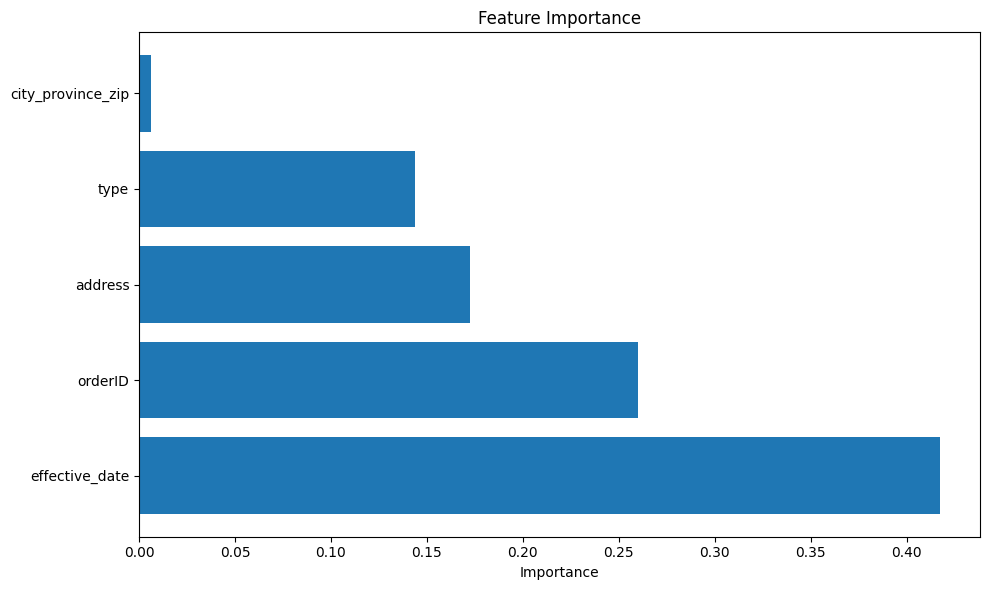

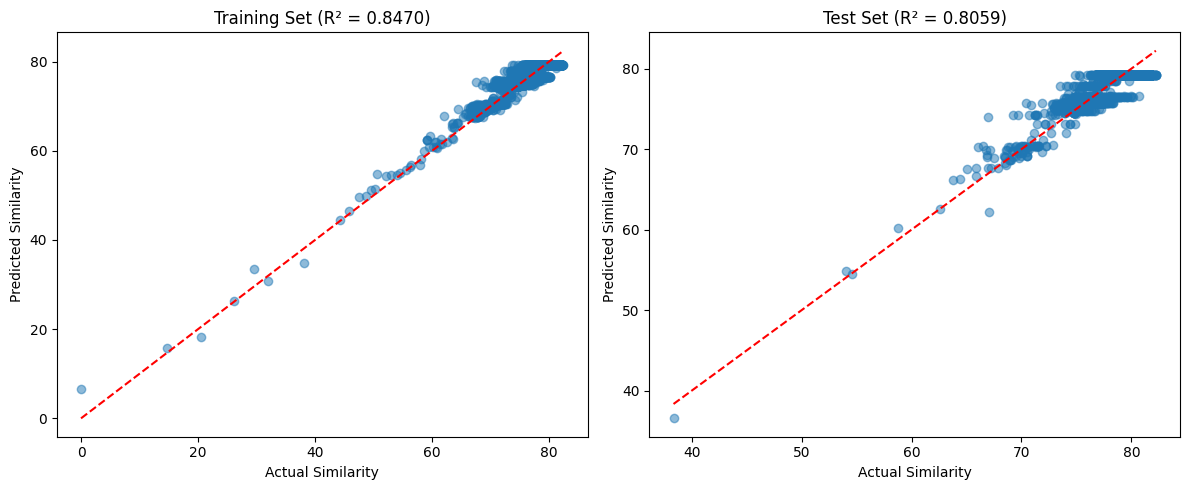

In [ ]:
test_subject = subjects.iloc[[0]]
print(f"Finding comps for: {test_subject['address'].values[0]}")
recommended_comps = get_top_comps(test_subject, potential_comps, knn_model, k=3)
print("\nDemonstrating property comparison...")


print("\nRecommended comparable properties:")
for i, (idx, comp) in enumerate(recommended_comps.iterrows()):
    print(f"\n{i+1}. {comp['address']}")
    print(f"   Structure Type: {comp['structure_type']}")
    for feat in ['year_built', 'gla', 'num_beds']:
        if feat in comp and not pd.isna(comp[feat]):
            print(f"   {feat.title()}: {comp[feat]}")
    if 'distance_km' in comp and not pd.isna(comp['distance_km']):
        print(f"   Distance: {comp['distance_km']:.2f} km")

# 8. Train and evaluate model
print("\nEvaluating property comparison model...")

# Create feature weights
feature_weights = {
    'structure_type': 3.0,
    'gla': 2.5,
    'year_built': 1.5,
    'num_beds': 1.0,
    'distance_km': 2.0
}

# Prepare the dataset - select only numerical columns or encode categoricals
X = potential_comps.copy()

# List of features to use (we'll only use numeric ones)
numeric_features = []
for feature in feature_weights.keys():
    if feature in X.columns:
        if pd.api.types.is_numeric_dtype(X[feature]):
            numeric_features.append(feature)
        else:
            print(f"Skipping non-numeric feature: {feature}")

# Get a subset with only numeric features
X_numeric = X[numeric_features].copy()

# Calculate a similarity target based on weighted features
y = np.zeros(len(X_numeric))
for feature, weight in feature_weights.items():
    if feature in numeric_features:
        # Normalize features
        if X_numeric[feature].std() > 0:
            X_numeric[feature] = (X_numeric[feature] - X_numeric[feature].mean()) / X_numeric[feature].std()

        # Add weighted contribution to similarity
        y += np.abs(X_numeric[feature].values) * weight

# Invert so higher values mean more similar
y = max(y) - y

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Create and train the model
model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Get feature importance
feature_importance = dict(zip(potential_comps, model.named_steps['model'].feature_importances_))

# Print metrics
print("\nModel Performance Metrics:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# 9. Visualize results
print("\nCreating visualizations...")

# Plot feature importance
plt.figure(figsize=(10, 6))
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
plt.barh([f[0] for f in sorted_importance], [f[1] for f in sorted_importance])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Plot actual vs predicted values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training set
ax1.scatter(y_train, y_train_pred, alpha=0.5)
ax1.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')
ax1.set_xlabel('Actual Similarity')
ax1.set_ylabel('Predicted Similarity')
ax1.set_title(f'Training Set (R² = {train_r2:.4f})')

# Test set
ax2.scatter(y_test, y_test_pred, alpha=0.5)
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
ax2.set_xlabel('Actual Similarity')
ax2.set_ylabel('Predicted Similarity')
ax2.set_title(f'Test Set (R² = {test_r2:.4f})')

plt.tight_layout()
plt.show()


In [ ]:
%pip install lime
%pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=088ed5a8f29d1b4855d29ec9ad84ed71f302991d69272ced364096181d8d4e65
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime



Generating SHAP explanation for the top comp...


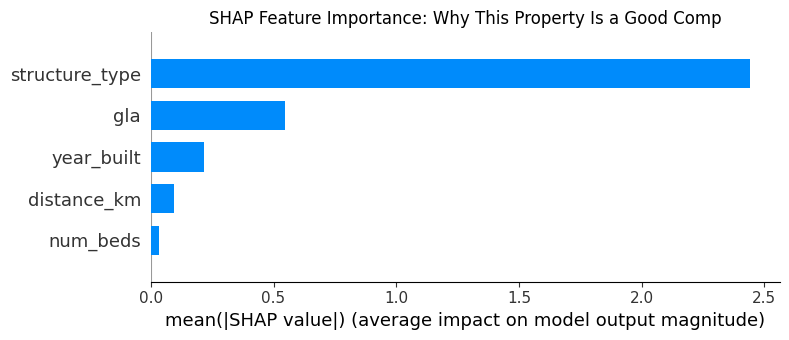


Property comparison analysis complete!


In [ ]:
import shap
try:
    print("\nGenerating SHAP explanation for the top comp...")

    # Get top comp
    top_comp = recommended_comps.iloc[0]

    # Extract only the numeric features that were used in the model
    comp_features = top_comp[numeric_features].to_frame().T

    # Create explainer
    explainer = shap.TreeExplainer(model.named_steps['model'])

    # Get SHAP values - we don't need to transform manually, let SHAP handle it
    shap_values = explainer.shap_values(comp_features)

    # Plot
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        shap_values,
        comp_features,
        feature_names=numeric_features,
        show=False,
        plot_type="bar"
    )
    plt.title('SHAP Feature Importance: Why This Property Is a Good Comp')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"SHAP visualization error: {e}")
    print("Skipping SHAP explanation")

print("\nProperty comparison analysis complete!")

In [ ]:
import pickle

with open('property_comp_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as 'property_comp_model.pkl'")


Model saved as 'property_comp_model.pkl'


In [ ]:
import joblib
joblib.dump(scaler, 'scaler.pkl')
potential_comps.to_csv('potential_comps.csv', index=False)